In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import os
import scipy.io
from scipy.io import loadmat, savemat
from scipy.stats import gaussian_kde
import chaospy as cp
import numpoly
import seaborn as sns

Pointwise Convergence of Bandgap Properties Study

In [2]:
#folder_root = r'E:\Research\Projects\UQ 2D Metamaterials\resolution scaling output variance study'
folder_root = r'resolution scaling output variance study'
bg_size_10p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_10x10.mat'))['bg_size']
bg_size_10p = float(bg_size_10p)
bg_size_20p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_20x20.mat'))['bg_size']
bg_size_20p = float(bg_size_20p)
bg_size_30p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_30x30.mat'))['bg_size']
bg_size_30p = float(bg_size_30p)
bg_size_40p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_40x40.mat'))['bg_size']
bg_size_40p = float(bg_size_40p)
bg_size_50p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_50x50.mat'))['bg_size']
bg_size_50p = float(bg_size_50p)
bg_size_60p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_60x60.mat'))['bg_size']
bg_size_60p = float(bg_size_60p)
bg_size_70p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_70x70.mat'))['bg_size']
bg_size_70p = float(bg_size_70p)
bg_size_80p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_80x80.mat'))['bg_size']
bg_size_80p = float(bg_size_80p)
bg_size_90p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_90x90.mat'))['bg_size']
bg_size_90p = float(bg_size_90p)
bg_size_100p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_100x100.mat'))['bg_size']
bg_size_100p = float(bg_size_100p)
bg_sizes = np.array([bg_size_10p, bg_size_20p, bg_size_30p, bg_size_40p, bg_size_50p, bg_size_60p, bg_size_70p, bg_size_80p, bg_size_90p, bg_size_100p])
print(bg_sizes)

[1464.76284676 1399.10267468 1384.97483147 1379.44072259 1376.60773841
 1374.9445992  1373.87152931 1373.13186909 1372.59644412 1372.19397465]


In [3]:
bg_top_10p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_10x10.mat'))['bg_top']
bg_top_10p = float(bg_top_10p)
bg_top_20p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_20x20.mat'))['bg_top']
bg_top_20p = float(bg_top_20p)
bg_top_30p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_30x30.mat'))['bg_top']
bg_top_30p = float(bg_top_30p)
bg_top_40p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_40x40.mat'))['bg_top']
bg_top_40p = float(bg_top_40p)
bg_top_50p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_50x50.mat'))['bg_top']
bg_top_50p = float(bg_top_50p)
bg_top_60p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_60x60.mat'))['bg_top']
bg_top_60p = float(bg_top_60p)
bg_top_70p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_70x70.mat'))['bg_top']
bg_top_70p = float(bg_top_70p)
bg_top_80p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_80x80.mat'))['bg_top']
bg_top_80p = float(bg_top_80p)
bg_top_90p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_90x90.mat'))['bg_top']
bg_top_90p = float(bg_top_90p)
bg_top_100p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_100x100.mat'))['bg_top']
bg_top_100p = float(bg_top_100p)
bg_tops = np.array([bg_top_10p, bg_top_20p, bg_top_30p, bg_top_40p, bg_top_50p, bg_top_60p, bg_top_70p, bg_top_80p, bg_top_90p, bg_top_100p])
print(bg_tops)

[2635.41277912 2554.99450755 2536.34090556 2528.69197521 2524.65647776
 2522.22644528 2520.62577626 2519.5030904  2518.67818653 2518.04999572]


In [4]:
bg_bottom_10p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_10x10.mat'))['bg_bottom']
bg_bottom_10p = float(bg_bottom_10p)
bg_bottom_20p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_20x20.mat'))['bg_bottom']
bg_bottom_20p = float(bg_bottom_20p)
bg_bottom_30p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_30x30.mat'))['bg_bottom']
bg_bottom_30p = float(bg_bottom_30p)
bg_bottom_40p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_40x40.mat'))['bg_bottom']
bg_bottom_40p = float(bg_bottom_40p)
bg_bottom_50p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_50x50.mat'))['bg_bottom']
bg_bottom_50p = float(bg_bottom_50p)
bg_bottom_60p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_60x60.mat'))['bg_bottom']
bg_bottom_60p = float(bg_bottom_60p)
bg_bottom_70p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_70x70.mat'))['bg_bottom']
bg_bottom_70p = float(bg_bottom_70p)
bg_bottom_80p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_80x80.mat'))['bg_bottom']
bg_bottom_80p = float(bg_bottom_80p)
bg_bottom_90p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_90x90.mat'))['bg_bottom']
bg_bottom_90p = float(bg_bottom_90p)
bg_bottom_100p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_100x100.mat'))['bg_bottom']
bg_bottom_100p = float(bg_bottom_100p)
bg_bottoms = np.array([bg_bottom_10p, bg_bottom_20p, bg_bottom_30p, bg_bottom_40p, bg_bottom_50p, bg_bottom_60p, bg_bottom_70p, bg_bottom_80p, bg_bottom_90p, bg_bottom_100p])
print(bg_bottoms)

[1170.64993236 1155.89183287 1151.36607409 1149.25125262 1148.04873935
 1147.28184608 1146.75424695 1146.37122131 1146.08174241 1145.85602108]


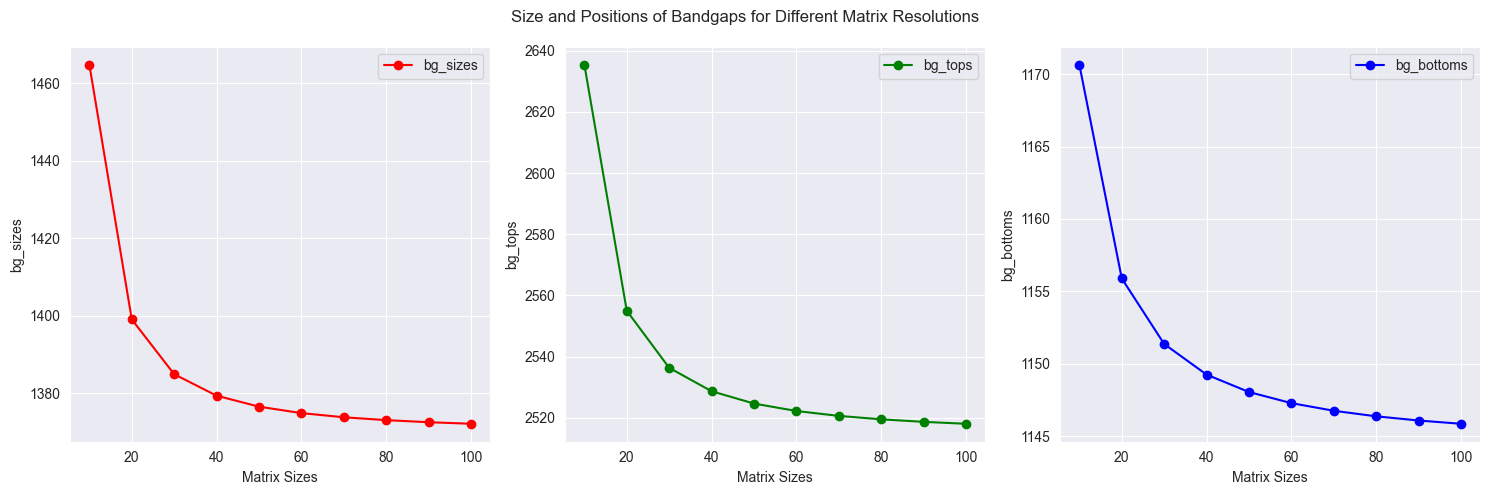

In [5]:
matrix_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Creating a 3-figure subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting bg_sizes against matrix_sizes in the first subplot
axes[0].plot(matrix_sizes, bg_sizes, marker='o', label='bg_sizes', color='red')
axes[0].set_xlabel('Matrix Sizes')
axes[0].set_ylabel('bg_sizes')
axes[0].legend()

# Plotting bg_tops against matrix_sizes in the second subplot
axes[1].plot(matrix_sizes, bg_tops, marker='o', label='bg_tops', color='green')
axes[1].set_xlabel('Matrix Sizes')
axes[1].set_ylabel('bg_tops')
axes[1].legend()

# Plotting bg_bottoms against matrix_sizes in the third subplot
axes[2].plot(matrix_sizes, bg_bottoms, marker='o', label='bg_bottoms', color='blue')
axes[2].set_xlabel('Matrix Sizes')
axes[2].set_ylabel('bg_bottoms')
axes[2].legend()

fig.suptitle('Size and Positions of Bandgaps for Different Matrix Resolutions')
plt.tight_layout()
plt.show()


Mesh Refinement Study

Compute Times Study

In [6]:
compute_time_10p = loadmat(os.path.join(folder_root, 'elapsed_time_default_10x10.mat'))['elapsedTime']
compute_time_10p = float(compute_time_10p)
compute_time_20p = loadmat(os.path.join(folder_root, 'elapsed_time_default_20x20.mat'))['elapsedTime']
compute_time_20p = float(compute_time_20p)
compute_time_30p = loadmat(os.path.join(folder_root, 'elapsed_time_default_30x30.mat'))['elapsedTime']
compute_time_30p = float(compute_time_30p)
compute_time_40p = loadmat(os.path.join(folder_root, 'elapsed_time_default_40x40.mat'))['elapsedTime']
compute_time_40p = float(compute_time_40p)
compute_time_50p = loadmat(os.path.join(folder_root, 'elapsed_time_default_50x50.mat'))['elapsedTime']
compute_time_50p = float(compute_time_50p)
compute_time_60p = loadmat(os.path.join(folder_root, 'elapsed_time_default_60x60.mat'))['elapsedTime']
compute_time_60p = float(compute_time_60p)
compute_time_70p = loadmat(os.path.join(folder_root, 'elapsed_time_default_70x70.mat'))['elapsedTime']
compute_time_70p = float(compute_time_70p)
compute_time_80p = loadmat(os.path.join(folder_root, 'elapsed_time_default_80x80.mat'))['elapsedTime']
compute_time_80p = float(compute_time_80p)
compute_time_90p = loadmat(os.path.join(folder_root, 'elapsed_time_default_90x90.mat'))['elapsedTime']
compute_time_90p = float(compute_time_90p)
compute_time_100p = loadmat(os.path.join(folder_root, 'elapsed_time_default_100x100.mat'))['elapsedTime']
compute_time_100p = float(compute_time_100p)
compute_times = np.array([compute_time_10p, compute_time_20p, compute_time_30p, compute_time_40p, compute_time_50p, compute_time_60p, compute_time_70p, compute_time_80p, compute_time_90p, compute_time_100p])
print(compute_times)

[  0.9839949   4.3871368   8.9672237  14.9380217  27.9205207  36.4241914
  57.8860935  64.8468288  95.0752999 106.6839978]


Text(0.5, 1.0, 'Matrix Compute Times as a Function of Matrix Resolution')

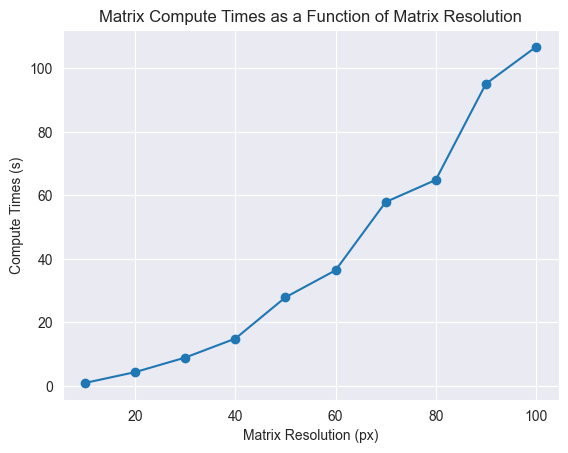

In [7]:
plt.figure()
plt.plot(matrix_sizes, compute_times, marker='o', label='compute_times')
plt.xlabel('Matrix Resolution (px)')
plt.ylabel('Compute Times (s)')
plt.title('Matrix Compute Times as a Function of Matrix Resolution')

Probabilistic Convergence of Bandgap Properties Study - Flip Chance Defect Generation

In [8]:
#Chance of mutation on edge pixels: 5%
#both materials counted for edge detection: True
#folder_root = r'E:\Research\Projects\UQ 2D Metamaterials\geometry_defect_effect_asymtote_study'
folder_root = r'geometry_defect_effect_asymtote_study'
#bg_size_10p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_10p_5%_n100.mat'))['bg_size']
bg_bottom_10p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_10p_5%_n100.mat'))['bg_bottom']
bg_top_10p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_10p_5%_n100.mat'))['bg_top']
bg_center_10p_n100 = (bg_top_10p_n100 + bg_bottom_10p_n100)/2
bg_size_10p_n100 = bg_top_10p_n100 - bg_bottom_10p_n100

#bg_size_20p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_20p_5%_n100.mat'))['bg_size']
bg_bottom_20p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_20p_5%_n100.mat'))['bg_bottom']
bg_top_20p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_20p_5%_n100.mat'))['bg_top']
bg_center_20p_n100 = (bg_top_20p_n100 + bg_bottom_20p_n100)/2
bg_size_20p_n100 = bg_top_20p_n100 - bg_bottom_20p_n100

#bg_size_30p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_30p_5%_n100.mat'))['bg_size']
bg_bottom_30p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_30p_5%_n100.mat'))['bg_bottom']
bg_top_30p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_30p_5%_n100.mat'))['bg_top']
bg_center_30p_n100 = (bg_top_30p_n100 + bg_bottom_30p_n100)/2
bg_size_30p_n100 = bg_top_30p_n100 - bg_bottom_30p_n100

#bg_size_40p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_40p_5%_n100.mat'))['bg_size']
bg_bottom_40p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_40p_5%_n100.mat'))['bg_bottom']
bg_top_40p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_40p_5%_n100.mat'))['bg_top']
bg_center_40p_n100 = (bg_top_40p_n100 + bg_bottom_40p_n100)/2
bg_size_40p_n100 = bg_top_40p_n100 - bg_bottom_40p_n100

#bg_size_50p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_50p_5%_n100.mat'))['bg_size']
bg_bottom_50p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_50p_5%_n100.mat'))['bg_bottom']
bg_top_50p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_50p_5%_n100.mat'))['bg_top']
bg_center_50p_n100 = (bg_top_50p_n100 + bg_bottom_50p_n100)/2
bg_size_50p_n100 = bg_top_50p_n100 - bg_bottom_50p_n100

#bg_size_60p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_60p_5%_n100.mat'))['bg_size']
bg_bottom_60p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_60p_5%_n100.mat'))['bg_bottom']
bg_top_60p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_60p_5%_n100.mat'))['bg_top']
bg_center_60p_n100 = (bg_top_60p_n100 + bg_bottom_60p_n100)/2
bg_size_60p_n100 = bg_top_60p_n100 - bg_bottom_60p_n100

#bg_size_70p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_70p_5%_n100.mat'))['bg_size']
bg_bottom_70p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_70p_5%_n100.mat'))['bg_bottom']
bg_top_70p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_70p_5%_n100.mat'))['bg_top']
bg_center_70p_n100 = (bg_top_70p_n100 + bg_bottom_70p_n100)/2
bg_size_70p_n100 = bg_top_70p_n100 - bg_bottom_70p_n100

#bg_size_80p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_80p_5%_n100.mat'))['bg_size']
bg_bottom_80p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_80p_5%_n100.mat'))['bg_bottom']
bg_top_80p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_80p_5%_n100.mat'))['bg_top']
bg_center_80p_n100 = (bg_top_80p_n100 - bg_bottom_80p_n100)/2
bg_size_80p_n100 = bg_top_80p_n100 - bg_bottom_80p_n100

keys = ['10p', '20p', '30p', '40p', '50p', '60p', '70p', '80p']
bg_sizes_n100 =  dict(zip(keys, [bg_size_10p_n100, bg_size_20p_n100, bg_size_30p_n100, bg_size_40p_n100, bg_size_50p_n100, bg_size_60p_n100, bg_size_70p_n100, bg_size_80p_n100]))
bg_bottoms_n100 = dict(zip(keys, [bg_bottom_10p_n100, bg_bottom_20p_n100, bg_bottom_30p_n100, bg_bottom_40p_n100, bg_bottom_50p_n100, bg_bottom_60p_n100, bg_bottom_70p_n100, bg_bottom_80p_n100]))
bg_tops_n100 = dict(zip(keys, [bg_top_10p_n100, bg_top_20p_n100, bg_top_30p_n100, bg_top_40p_n100, bg_top_50p_n100, bg_top_60p_n100, bg_top_70p_n100, bg_top_80p_n100]))
bg_centers_n100 = dict(zip(keys, [bg_center_10p_n100, bg_center_20p_n100, bg_center_30p_n100, bg_center_40p_n100, bg_center_50p_n100, bg_center_60p_n100, bg_center_70p_n100, bg_center_80p_n100]))

#print(len(bg_centers_n100))
print('bandgap center for arbitrary resolution matrix')
print(bg_centers_n100['10p'])
print('variance of above array ' + str(np.var(bg_centers_n100['10p'])))
print('\n')
print('bandgap bottom for arbitrary resolution matrix')
print(bg_bottoms_n100['10p'])
print('variance of above array ' + str(np.var(bg_bottoms_n100['10p'])))
print('\n')
print('bandgap top for arbitrary resolution matrix')
print(bg_tops_n100['10p'])
print('variance of above array ' + str(np.var(bg_tops_n100['10p'])))
print('\n')
print('bandgap size for arbitrary resolution matrix')
print(bg_sizes_n100['10p'])
print('variance of above array ' + str(np.var(bg_sizes_n100['10p'])))

bandgap center for arbitrary resolution matrix
[[1903.03135672 2779.22723769 1943.52764611 1903.22579628 1914.77670303
  1903.03135672 1851.07020951 1870.01555362 1899.99431709 2021.38917193
  1902.95860133 1569.48718357 1887.08132387 1968.79805435 2026.56397091
  1932.71018933 1848.20289142 2003.69807786 2021.01271322 1940.94638383
  1956.59435458 1991.26610243 2071.39525616 1954.04595543 1903.0878566
  1921.19712035 2018.61826255 2061.34095403 1429.89222328 1900.51881993
  1975.5948161  1899.12653517 2112.18527402 1899.52872368 1967.0266508
  1929.90196202 1966.71014651 1968.65711187 1869.94363644 2011.08035151
  1846.57253192 1939.37632242 1790.25254499 1565.76626766 1967.09665268
  1903.24054529 1912.70303683 1969.3094222  1933.2847517  1961.94846989
  1931.82740071 1994.14463527 1912.70303683 1941.86396938 1905.91559096
  1895.65955189 1919.26296254 1852.93500872 1966.90812958 1988.78168433
  1790.65879859 1969.71485728 1703.65365141 1967.63257599 1944.54822987
  1903.16333967 205

Text(0.5, 0.98, "Histograms of 100 MC Samples' Computed Bandgap Size \nand Center Locations for Different Resolutions (10-40 px)")

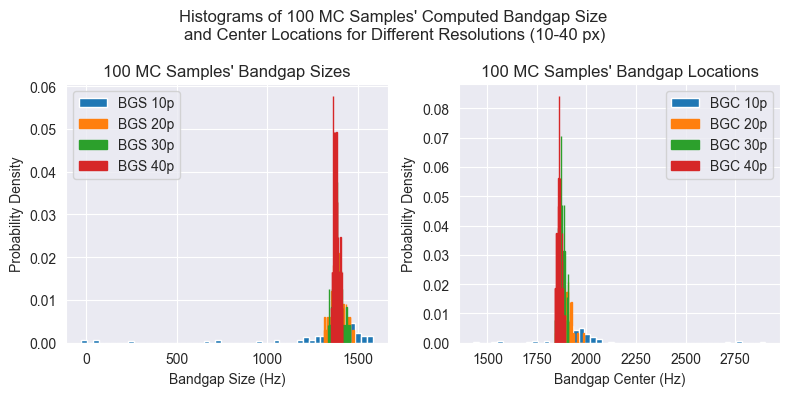

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
# for i in range(8):
#     axs[0].hist(bg_sizes_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
#     axs[1].hist(bg_centers_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))
axs[0].hist(bg_sizes_n100['10p'].flatten(), bins=50, density=True, alpha=1, color='C0', label='BGS 10p')
axs[1].hist(bg_centers_n100['10p'].flatten(), bins=50, density=True, alpha=1, color='C0', label='BGC 10p')
axs[0].hist(bg_sizes_n100['20p'].flatten(), bins=50, density=True, alpha=1, color='C1', edgecolor='C1', label='BGS 20p')
axs[1].hist(bg_centers_n100['20p'].flatten(), bins=50, density=True, alpha=1, color='C1', edgecolor='C1', label='BGC 20p')
axs[0].hist(bg_sizes_n100['30p'].flatten(), bins=50, density=True, alpha=1, color='C2', edgecolor='C2', label='BGS 30p')
axs[1].hist(bg_centers_n100['30p'].flatten(), bins=50, density=True, alpha=1, color='C2', edgecolor='C2', label='BGC 30p')
axs[0].hist(bg_sizes_n100['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', edgecolor='C3', label='BGS 40p')
axs[1].hist(bg_centers_n100['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', edgecolor='C3',label='BGC 40p')

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples\' Bandgap Sizes')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples\' Bandgap Locations')

title_str = 'Histograms of 100 MC Samples\' Computed Bandgap Size \nand Center Locations for Different Resolutions (10-40 px)'
plt.suptitle(title_str)

Text(0.5, 0.98, "Histograms of 100 MC Samples' Computed Bandgap Size \nand Center Locations for Different Resolutions (40-70 px)")

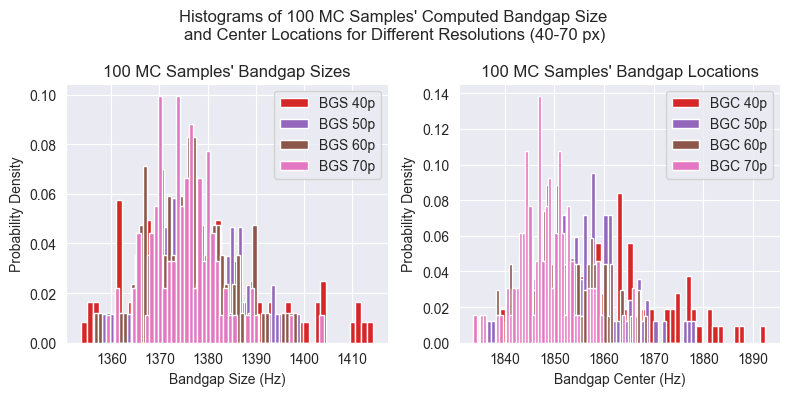

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
# for i in range(8):
#     axs[0].hist(bg_sizes_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
#     axs[1].hist(bg_centers_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))
axs[0].hist(bg_sizes_n100['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', label='BGS 40p')
axs[1].hist(bg_centers_n100['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', label='BGC 40p')
axs[0].hist(bg_sizes_n100['50p'].flatten(), bins=50, density=True, alpha=1, color='C4', label='BGS 50p')
axs[1].hist(bg_centers_n100['50p'].flatten(), bins=50, density=True, alpha=1, color='C4', label='BGC 50p')
axs[0].hist(bg_sizes_n100['60p'].flatten(), bins=50, density=True, alpha=1, color='C5', label='BGS 60p')
axs[1].hist(bg_centers_n100['60p'].flatten(), bins=50, density=True, alpha=1, color='C5', label='BGC 60p')
axs[0].hist(bg_sizes_n100['70p'].flatten(), bins=50, density=True, alpha=1, color='C6', label='BGS 70p')
axs[1].hist(bg_centers_n100['70p'].flatten(), bins=50, density=True, alpha=1, color='C6', label='BGC 70p')

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples\' Bandgap Sizes')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples\' Bandgap Locations')

title_str = 'Histograms of 100 MC Samples\' Computed Bandgap Size \nand Center Locations for Different Resolutions (40-70 px)'
plt.suptitle(title_str)

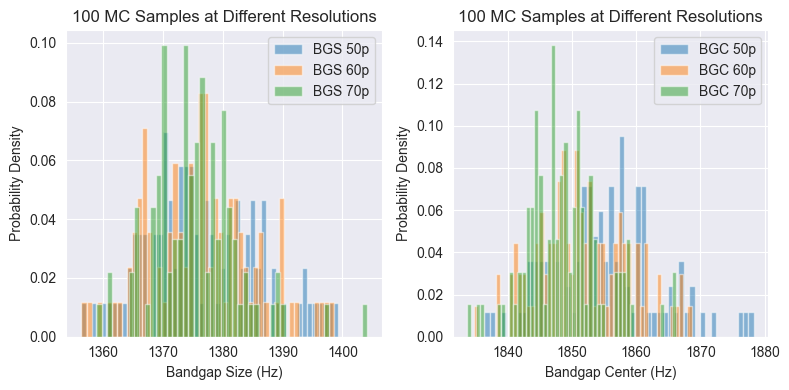

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
# for i in range(8):
#     axs[0].hist(bg_sizes_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
#     axs[1].hist(bg_centers_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))
axs[0].hist(bg_sizes_n100['50p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS 50p')
axs[1].hist(bg_centers_n100['50p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC 50p')
axs[0].hist(bg_sizes_n100['60p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS 60p')
axs[1].hist(bg_centers_n100['60p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC 60p')
axs[0].hist(bg_sizes_n100['70p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS 70p')
axs[1].hist(bg_centers_n100['70p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC 70p')

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples at Different Resolutions')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples at Different Resolutions')

title_str = 'Histograms of 100 MC Samples Computed Bandgap Size and Center Locations\n for Different Resolutions (10-80 px)'

Text(0.5, 0.98, 'Histograms of 100 MC Samples Computed Bandgap Size and Center Locations\n for Different Resolutions (10-80 px)')

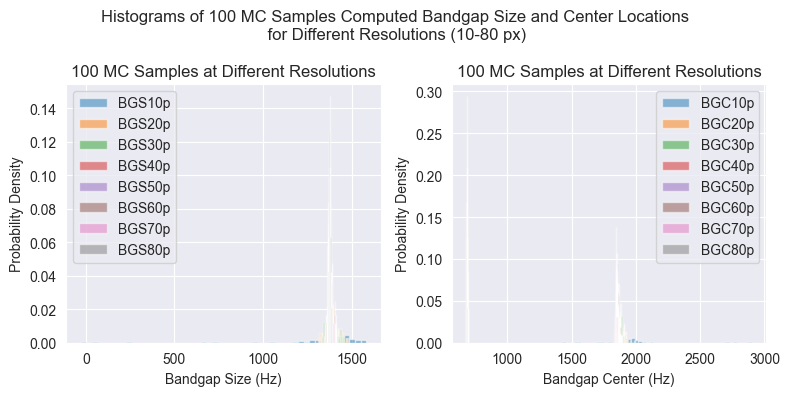

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
for i in range(8):
    axs[0].hist(bg_sizes_n100[str(10*(i+1))+'p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
    axs[1].hist(bg_centers_n100[str(10*(i+1))+'p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples at Different Resolutions')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples at Different Resolutions')

title_str = 'Histograms of 100 MC Samples Computed Bandgap Size and Center Locations\n for Different Resolutions (10-80 px)'
fig.suptitle(title_str)

Results for Flip Proportion Studies

In [14]:
#Chance of mutation on edge pixels: 5%
#both materials counted for edge detection: True
#folder_root = r'E:\Research\Projects\UQ 2D Metamaterials\geometry_defect_effect_asymtote_study'
folder_root = r'geometry_defect_effect_asymtote_study_fp_gaussian'

#bg_size_10p_n100_fp = loadmat(os.path.join(folder_root, 'bg_size_uniform_10p_5%_n100.mat'))['bg_size']
bg_bottom_10p_n100_fp = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_10p_5%_n100.mat'))['bg_bottom']
bg_top_10p_n100_fp = loadmat(os.path.join(folder_root, 'bg_top_uniform_10p_5%_n100.mat'))['bg_top']
bg_center_10p_n100_fp = (bg_top_10p_n100_fp + bg_bottom_10p_n100_fp)/2
bg_size_10p_n100_fp = bg_top_10p_n100_fp - bg_bottom_10p_n100_fp

#bg_size_20p_n100_fp = loadmat(os.path.join(folder_root, 'bg_size_uniform_20p_5%_n100.mat'))['bg_size']
bg_bottom_20p_n100_fp = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_20p_5%_n100.mat'))['bg_bottom']
bg_top_20p_n100_fp = loadmat(os.path.join(folder_root, 'bg_top_uniform_20p_5%_n100.mat'))['bg_top']
bg_center_20p_n100_fp = (bg_top_20p_n100_fp + bg_bottom_20p_n100_fp)/2
bg_size_20p_n100_fp = bg_top_20p_n100_fp - bg_bottom_20p_n100_fp

#bg_size_30p_n100_fp = loadmat(os.path.join(folder_root, 'bg_size_uniform_30p_5%_n100.mat'))['bg_size']
bg_bottom_30p_n100_fp = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_30p_5%_n100.mat'))['bg_bottom']
bg_top_30p_n100_fp = loadmat(os.path.join(folder_root, 'bg_top_uniform_30p_5%_n100.mat'))['bg_top']
bg_center_30p_n100_fp = (bg_top_30p_n100_fp + bg_bottom_30p_n100_fp)/2
bg_size_30p_n100_fp = bg_top_30p_n100_fp - bg_bottom_30p_n100_fp

#bg_size_40p_n100_fp = loadmat(os.path.join(folder_root, 'bg_size_uniform_40p_5%_n100.mat'))['bg_size']
bg_bottom_40p_n100_fp = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_40p_5%_n100.mat'))['bg_bottom']
bg_top_40p_n100_fp = loadmat(os.path.join(folder_root, 'bg_top_uniform_40p_5%_n100.mat'))['bg_top']
bg_center_40p_n100_fp = (bg_top_40p_n100_fp + bg_bottom_40p_n100_fp)/2
bg_size_40p_n100_fp = bg_top_40p_n100_fp - bg_bottom_40p_n100_fp

#bg_size_50p_n100_fp = loadmat(os.path.join(folder_root, 'bg_size_uniform_50p_5%_n100.mat'))['bg_size']
bg_bottom_50p_n100_fp = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_50p_5%_n100.mat'))['bg_bottom']
bg_top_50p_n100_fp = loadmat(os.path.join(folder_root, 'bg_top_uniform_50p_5%_n100.mat'))['bg_top']
bg_center_50p_n100_fp = (bg_top_50p_n100_fp + bg_bottom_50p_n100_fp)/2
bg_size_50p_n100_fp = bg_top_50p_n100_fp - bg_bottom_50p_n100_fp

#bg_size_60p_n100_fp = loadmat(os.path.join(folder_root, 'bg_size_uniform_60p_5%_n100.mat'))['bg_size']
bg_bottom_60p_n100_fp = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_60p_5%_n100.mat'))['bg_bottom']
bg_top_60p_n100_fp = loadmat(os.path.join(folder_root, 'bg_top_uniform_60p_5%_n100.mat'))['bg_top']
bg_center_60p_n100_fp = (bg_top_60p_n100_fp + bg_bottom_60p_n100_fp)/2
bg_size_60p_n100_fp = bg_top_60p_n100_fp - bg_bottom_60p_n100_fp

#bg_size_70p_n100_fp = loadmat(os.path.join(folder_root, 'bg_size_uniform_70p_5%_n100.mat'))['bg_size']
bg_bottom_70p_n100_fp = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_70p_5%_n100.mat'))['bg_bottom']
bg_top_70p_n100_fp = loadmat(os.path.join(folder_root, 'bg_top_uniform_70p_5%_n100.mat'))['bg_top']
bg_center_70p_n100_fp = (bg_top_70p_n100_fp + bg_bottom_70p_n100_fp)/2
bg_size_70p_n100_fp = bg_top_70p_n100_fp - bg_bottom_70p_n100_fp

#bg_size_80p_n100_fp = loadmat(os.path.join(folder_root, 'bg_size_uniform_80p_5%_n100.mat'))['bg_size']
# bg_bottom_80p_n100_fp = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_80p_5%_n100.mat'))['bg_bottom']
# bg_top_80p_n100_fp = loadmat(os.path.join(folder_root, 'bg_top_uniform_80p_5%_n100.mat'))['bg_top']
# bg_center_80p_n100_fp = (bg_top_80p_n100_fp - bg_bottom_80p_n100_fp)/2
# bg_size_80p_n100_fp = bg_top_80p_n100_fp - bg_bottom_80p_n100_fp

#keys = ['10p', '20p', '30p', '40p', '50p', '60p', '70p', '80p']
# bg_sizes_n100_fp =  dict(zip(keys, [bg_size_10p_n100_fp, bg_size_20p_n100_fp, bg_size_30p_n100_fp, bg_size_40p_n100_fp, bg_size_50p_n100_fp, bg_size_60p_n100_fp, bg_size_70p_n100_fp, bg_size_80p_n100_fp]))
# bg_bottoms_n100_fp = dict(zip(keys, [bg_bottom_10p_n100_fp, bg_bottom_20p_n100_fp, bg_bottom_30p_n100_fp, bg_bottom_40p_n100_fp, bg_bottom_50p_n100_fp, bg_bottom_60p_n100_fp, bg_bottom_70p_n100_fp, bg_bottom_80p_n100_fp]))
# bg_tops_n100_fp = dict(zip(keys, [bg_top_10p_n100_fp, bg_top_20p_n100_fp, bg_top_30p_n100_fp, bg_top_40p_n100_fp, bg_top_50p_n100_fp, bg_top_60p_n100_fp, bg_top_70p_n100_fp, bg_top_80p_n100_fp]))
# bg_centers_n100_fp = dict(zip(keys, [bg_center_10p_n100_fp, bg_center_20p_n100_fp, bg_center_30p_n100_fp, bg_center_40p_n100_fp, bg_center_50p_n100_fp, bg_center_60p_n100_fp, bg_center_70p_n100_fp, bg_center_80p_n100_fp]))

keys = ['10p', '20p', '30p', '40p', '50p', '60p', '70p']
bg_sizes_n100_fp =  dict(zip(keys, [bg_size_10p_n100_fp, bg_size_20p_n100_fp, bg_size_30p_n100_fp, bg_size_40p_n100_fp, bg_size_50p_n100_fp, bg_size_60p_n100_fp, bg_size_70p_n100_fp]))
bg_bottoms_n100_fp = dict(zip(keys, [bg_bottom_10p_n100_fp, bg_bottom_20p_n100_fp, bg_bottom_30p_n100_fp, bg_bottom_40p_n100_fp, bg_bottom_50p_n100_fp, bg_bottom_60p_n100_fp, bg_bottom_70p_n100_fp]))
bg_tops_n100_fp = dict(zip(keys, [bg_top_10p_n100_fp, bg_top_20p_n100_fp, bg_top_30p_n100_fp, bg_top_40p_n100_fp, bg_top_50p_n100_fp, bg_top_60p_n100_fp, bg_top_70p_n100_fp]))
bg_centers_n100_fp = dict(zip(keys, [bg_center_10p_n100_fp, bg_center_20p_n100_fp, bg_center_30p_n100_fp, bg_center_40p_n100_fp, bg_center_50p_n100_fp, bg_center_60p_n100_fp, bg_center_70p_n100_fp]))

#print(len(bg_centers_n100_fp))
print('bandgap center for arbitrary resolution matrix')
print(bg_centers_n100_fp['10p'])
print('variance of above array ' + str(np.var(bg_centers_n100_fp['10p'])))
print('\n')
print('bandgap bottom for arbitrary resolution matrix')
print(bg_bottoms_n100_fp['10p'])
print('variance of above array ' + str(np.var(bg_bottoms_n100_fp['10p'])))
print('\n')
print('bandgap top for arbitrary resolution matrix')
print(bg_tops_n100_fp['10p'])
print('variance of above array ' + str(np.var(bg_tops_n100_fp['10p'])))
print('\n')
print('bandgap size for arbitrary resolution matrix')
print(bg_sizes_n100_fp['10p'])
print('variance of above array ' + str(np.var(bg_sizes_n100_fp['10p'])))

bandgap center for arbitrary resolution matrix
[[1928.49496734 1933.87187608 2017.45392273 1880.3925821  1967.68408399
  1960.09743975 2016.78405886 2024.89403405 1963.45556799 1995.12276911
  1361.94048365 1990.2560604  1927.82466929 1902.43834689 1906.42204229
  1962.81938033 1929.10374145 2010.27073367 1957.66758902 1963.26248569
  1989.99419758 1957.21321738 1966.67725162 1938.46000896 1947.22446745
  1976.20972913 1923.27704286 1921.73706745 1880.77824785 2008.57682335
  2004.79169243 2009.07080923 1921.79810403 1729.02736621 1965.83727423
  1929.63477184 2036.55322364 1963.80794746 1965.89273116 1940.34742968
  2012.77337746 1869.45320117 1897.0765175  1941.91825677 1905.45775314
  1937.31438294 2027.06871577 1963.82955946 1983.21457563 1896.86986928
  1993.10458547 1907.26237377 2040.89703014 1993.84490686 1873.64027957
  1987.26108657 1881.00483412 1926.12701213 1896.65421436 1959.95620595
  1966.65494519 1966.93096931 1864.58127726 1989.37012873 1863.65878936
  1961.06650727 1

Text(0.5, 0.98, "Histograms of 100 MC Samples' (FP) Computed Bandgap Size \nand Center Locations for Different Resolutions (10-40 px)")

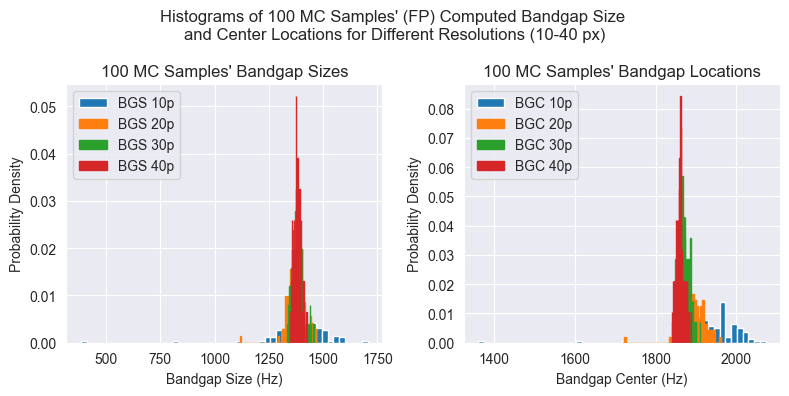

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
# for i in range(8):
#     axs[0].hist(bg_sizes_n100_fp[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
#     axs[1].hist(bg_centers_n100_fp[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))
axs[0].hist(bg_sizes_n100_fp['10p'].flatten(), bins=50, density=True, alpha=1, color='C0', label='BGS 10p')
axs[1].hist(bg_centers_n100_fp['10p'].flatten(), bins=50, density=True, alpha=1, color='C0', label='BGC 10p')
axs[0].hist(bg_sizes_n100_fp['20p'].flatten(), bins=50, density=True, alpha=1, color='C1', edgecolor='C1', label='BGS 20p')
axs[1].hist(bg_centers_n100_fp['20p'].flatten(), bins=50, density=True, alpha=1, color='C1', edgecolor='C1', label='BGC 20p')
axs[0].hist(bg_sizes_n100_fp['30p'].flatten(), bins=50, density=True, alpha=1, color='C2', edgecolor='C2', label='BGS 30p')
axs[1].hist(bg_centers_n100_fp['30p'].flatten(), bins=50, density=True, alpha=1, color='C2', edgecolor='C2', label='BGC 30p')
axs[0].hist(bg_sizes_n100_fp['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', edgecolor='C3', label='BGS 40p')
axs[1].hist(bg_centers_n100_fp['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', edgecolor='C3',label='BGC 40p')

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples\' Bandgap Sizes')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples\' Bandgap Locations')

title_str = 'Histograms of 100 MC Samples\' (FP) Computed Bandgap Size \nand Center Locations for Different Resolutions (10-40 px)'
plt.suptitle(title_str)

Text(0.5, 0.98, "Histograms of 100 MC Samples' (FP) Computed Bandgap Size \nand Center Locations for Different Resolutions (40-70 px)")

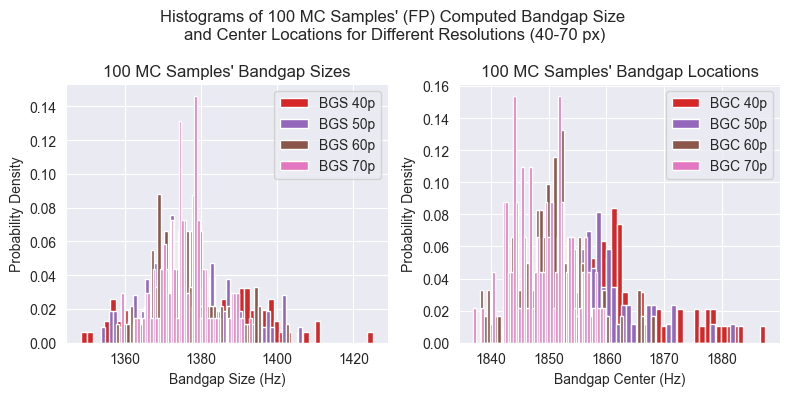

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
# for i in range(8):
#     axs[0].hist(bg_sizes_n100_fp[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
#     axs[1].hist(bg_centers_n100_fp[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))
axs[0].hist(bg_sizes_n100_fp['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', label='BGS 40p')
axs[1].hist(bg_centers_n100_fp['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', label='BGC 40p')
axs[0].hist(bg_sizes_n100_fp['50p'].flatten(), bins=50, density=True, alpha=1, color='C4', label='BGS 50p')
axs[1].hist(bg_centers_n100_fp['50p'].flatten(), bins=50, density=True, alpha=1, color='C4', label='BGC 50p')
axs[0].hist(bg_sizes_n100_fp['60p'].flatten(), bins=50, density=True, alpha=1, color='C5', label='BGS 60p')
axs[1].hist(bg_centers_n100_fp['60p'].flatten(), bins=50, density=True, alpha=1, color='C5', label='BGC 60p')
axs[0].hist(bg_sizes_n100_fp['70p'].flatten(), bins=50, density=True, alpha=1, color='C6', label='BGS 70p')
axs[1].hist(bg_centers_n100_fp['70p'].flatten(), bins=50, density=True, alpha=1, color='C6', label='BGC 70p')

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples\' Bandgap Sizes')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples\' Bandgap Locations')

title_str = 'Histograms of 100 MC Samples\' (FP) Computed Bandgap Size \nand Center Locations for Different Resolutions (40-70 px)'
plt.suptitle(title_str)

Text(0.5, 0.98, 'Histograms of 100 MC Samples (FP) Computed Bandgap Size\n and Center Locations for Different Resolutions (10-70 px)')

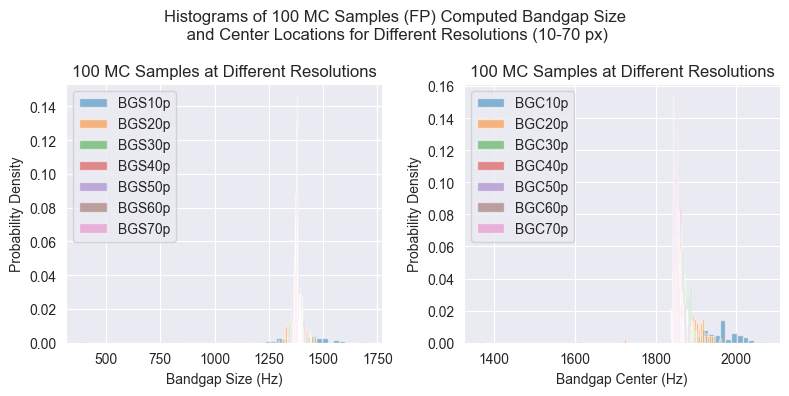

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
for i in range(7):
    axs[0].hist(bg_sizes_n100_fp[str(10*(i+1))+'p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
    axs[1].hist(bg_centers_n100_fp[str(10*(i+1))+'p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples at Different Resolutions')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples at Different Resolutions')

title_str = 'Histograms of 100 MC Samples (FP) Computed Bandgap Size\n and Center Locations for Different Resolutions (10-70 px)'
fig.suptitle(title_str)

### OBSOLETE CODE BELOW ###